#### <center>GeekUniversity: Факультет Искуственного Интелелкта</center>
#### <center>Курс: Python для Data Science 2</center>
#### <center>Курсовой проект: Построение модели классификации</center>
#### <center>Автор: Алексей Зелепукин</center>

**Задача**

Требуется, на основании имеющихся данных о клиентах банка, построить модель, используя обучающий датасет, для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета.

**Наименование файлов с данными**

course_project_train.csv - обучающий датасет<br>
course_project_test.csv - тестовый датасет

**Целевая переменная**

Credit Default - факт невыполнения кредитных обязательств

**Метрика качества**

F1-score (sklearn.metrics.f1_score)

**Требования к решению**

Целевая метрика
* F1 > 0.5 при Precision > 0.5 и Recall > 0.5
* Метрика оценивается по качеству прогноза для главного класса (1 - просрочка по кредиту)

**Решение должно содержать**
1. Тетрадка(ки) Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}_solution.ipynb, пример SShirkin_solution.ipynb
2. Файл CSV с прогнозами целевой переменной для тестового датасета, названный по образцу {ФИО}_predictions.csv, пример SShirkin_predictions.csv

**Рекомендации для файла с кодом (ipynb)**
1. Файл должен содержать заголовки и комментарии (markdown)
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. Допускается применение библиотек Python и моделей машинного обучения, которые были в данном курсе.

**Примерное описание этапов выполнения курсового проекта**

**Построение модели классификации**
1. Обзор обучающего датасета
2. Обработка выбросов
3. Обработка пропусков
4. Анализ данных
5. Отбор признаков
6. Балансировка классов
7. Подбор моделей, получение бейзлана
8. Выбор наилучшей модели, настройка гиперпараметров
9. Проверка качества, борьба с переобучением
10. Интерпретация результатов

**Прогнозирование на тестовом датасете**
1. Выполнить для тестового датасета те же этапы обработки и постронияния признаков
2. Спрогнозировать целевую переменную, используя модель, построенную на обучающем датасете
3. Прогнозы должны быть для всех примеров из тестового датасета (для всех строк)
4. Соблюдать исходный порядок примеров из тестового датасета

**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые льготы
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

#### Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
TRAIN_DATASET_PATH = './course_project_train.csv'
TEST_DATASET_PATH = './course_project_test.csv'

In [3]:
train = pd.read_csv(TRAIN_DATASET_PATH)
test = pd.read_csv(TEST_DATASET_PATH)

In [4]:
train.head(2)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1


In [5]:
test.head(2)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0


#### Обзор данных

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
Home Ownership                  7500 non-null object
Annual Income                   5943 non-null float64
Years in current job            7129 non-null object
Tax Liens                       7500 non-null float64
Number of Open Accounts         7500 non-null float64
Years of Credit History         7500 non-null float64
Maximum Open Credit             7500 non-null float64
Number of Credit Problems       7500 non-null float64
Months since last delinquent    3419 non-null float64
Bankruptcies                    7486 non-null float64
Purpose                         7500 non-null object
Term                            7500 non-null object
Current Loan Amount             7500 non-null float64
Current Credit Balance          7500 non-null float64
Monthly Debt                    7500 non-null float64
Credit Score                    5943 non-null float64
Credit Default                  7

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income,5943.0,1.366392e+06,8.453392e+05,164597.0,844341.0,1168386.0,1640137.00,1.014934e+07
Tax Liens,7500.0,3.013333e-02,2.716035e-01,0.0,0.0,0.0,0.00,7.000000e+00
Number of Open Accounts,7500.0,1.113093e+01,4.908924e+00,2.0,8.0,10.0,14.00,4.300000e+01
Years of Credit History,7500.0,1.831747e+01,7.041946e+00,4.0,13.5,17.0,21.80,5.770000e+01
Maximum Open Credit,7500.0,9.451537e+05,1.602622e+07,0.0,279229.5,478159.0,793501.50,1.304726e+09
Number of Credit Problems,7500.0,1.700000e-01,4.985978e-01,0.0,0.0,0.0,0.00,7.000000e+00
Months since last delinquent,3419.0,3.469260e+01,2.168881e+01,0.0,16.0,32.0,50.00,1.180000e+02
Bankruptcies,7486.0,1.171520e-01,3.471917e-01,0.0,0.0,0.0,0.00,4.000000e+00
Current Loan Amount,7500.0,1.187318e+07,3.192612e+07,11242.0,180169.0,309573.0,519882.00,1.000000e+08
Current Credit Balance,7500.0,2.898332e+05,3.178714e+05,0.0,114256.5,209323.0,360406.25,6.506797e+06


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


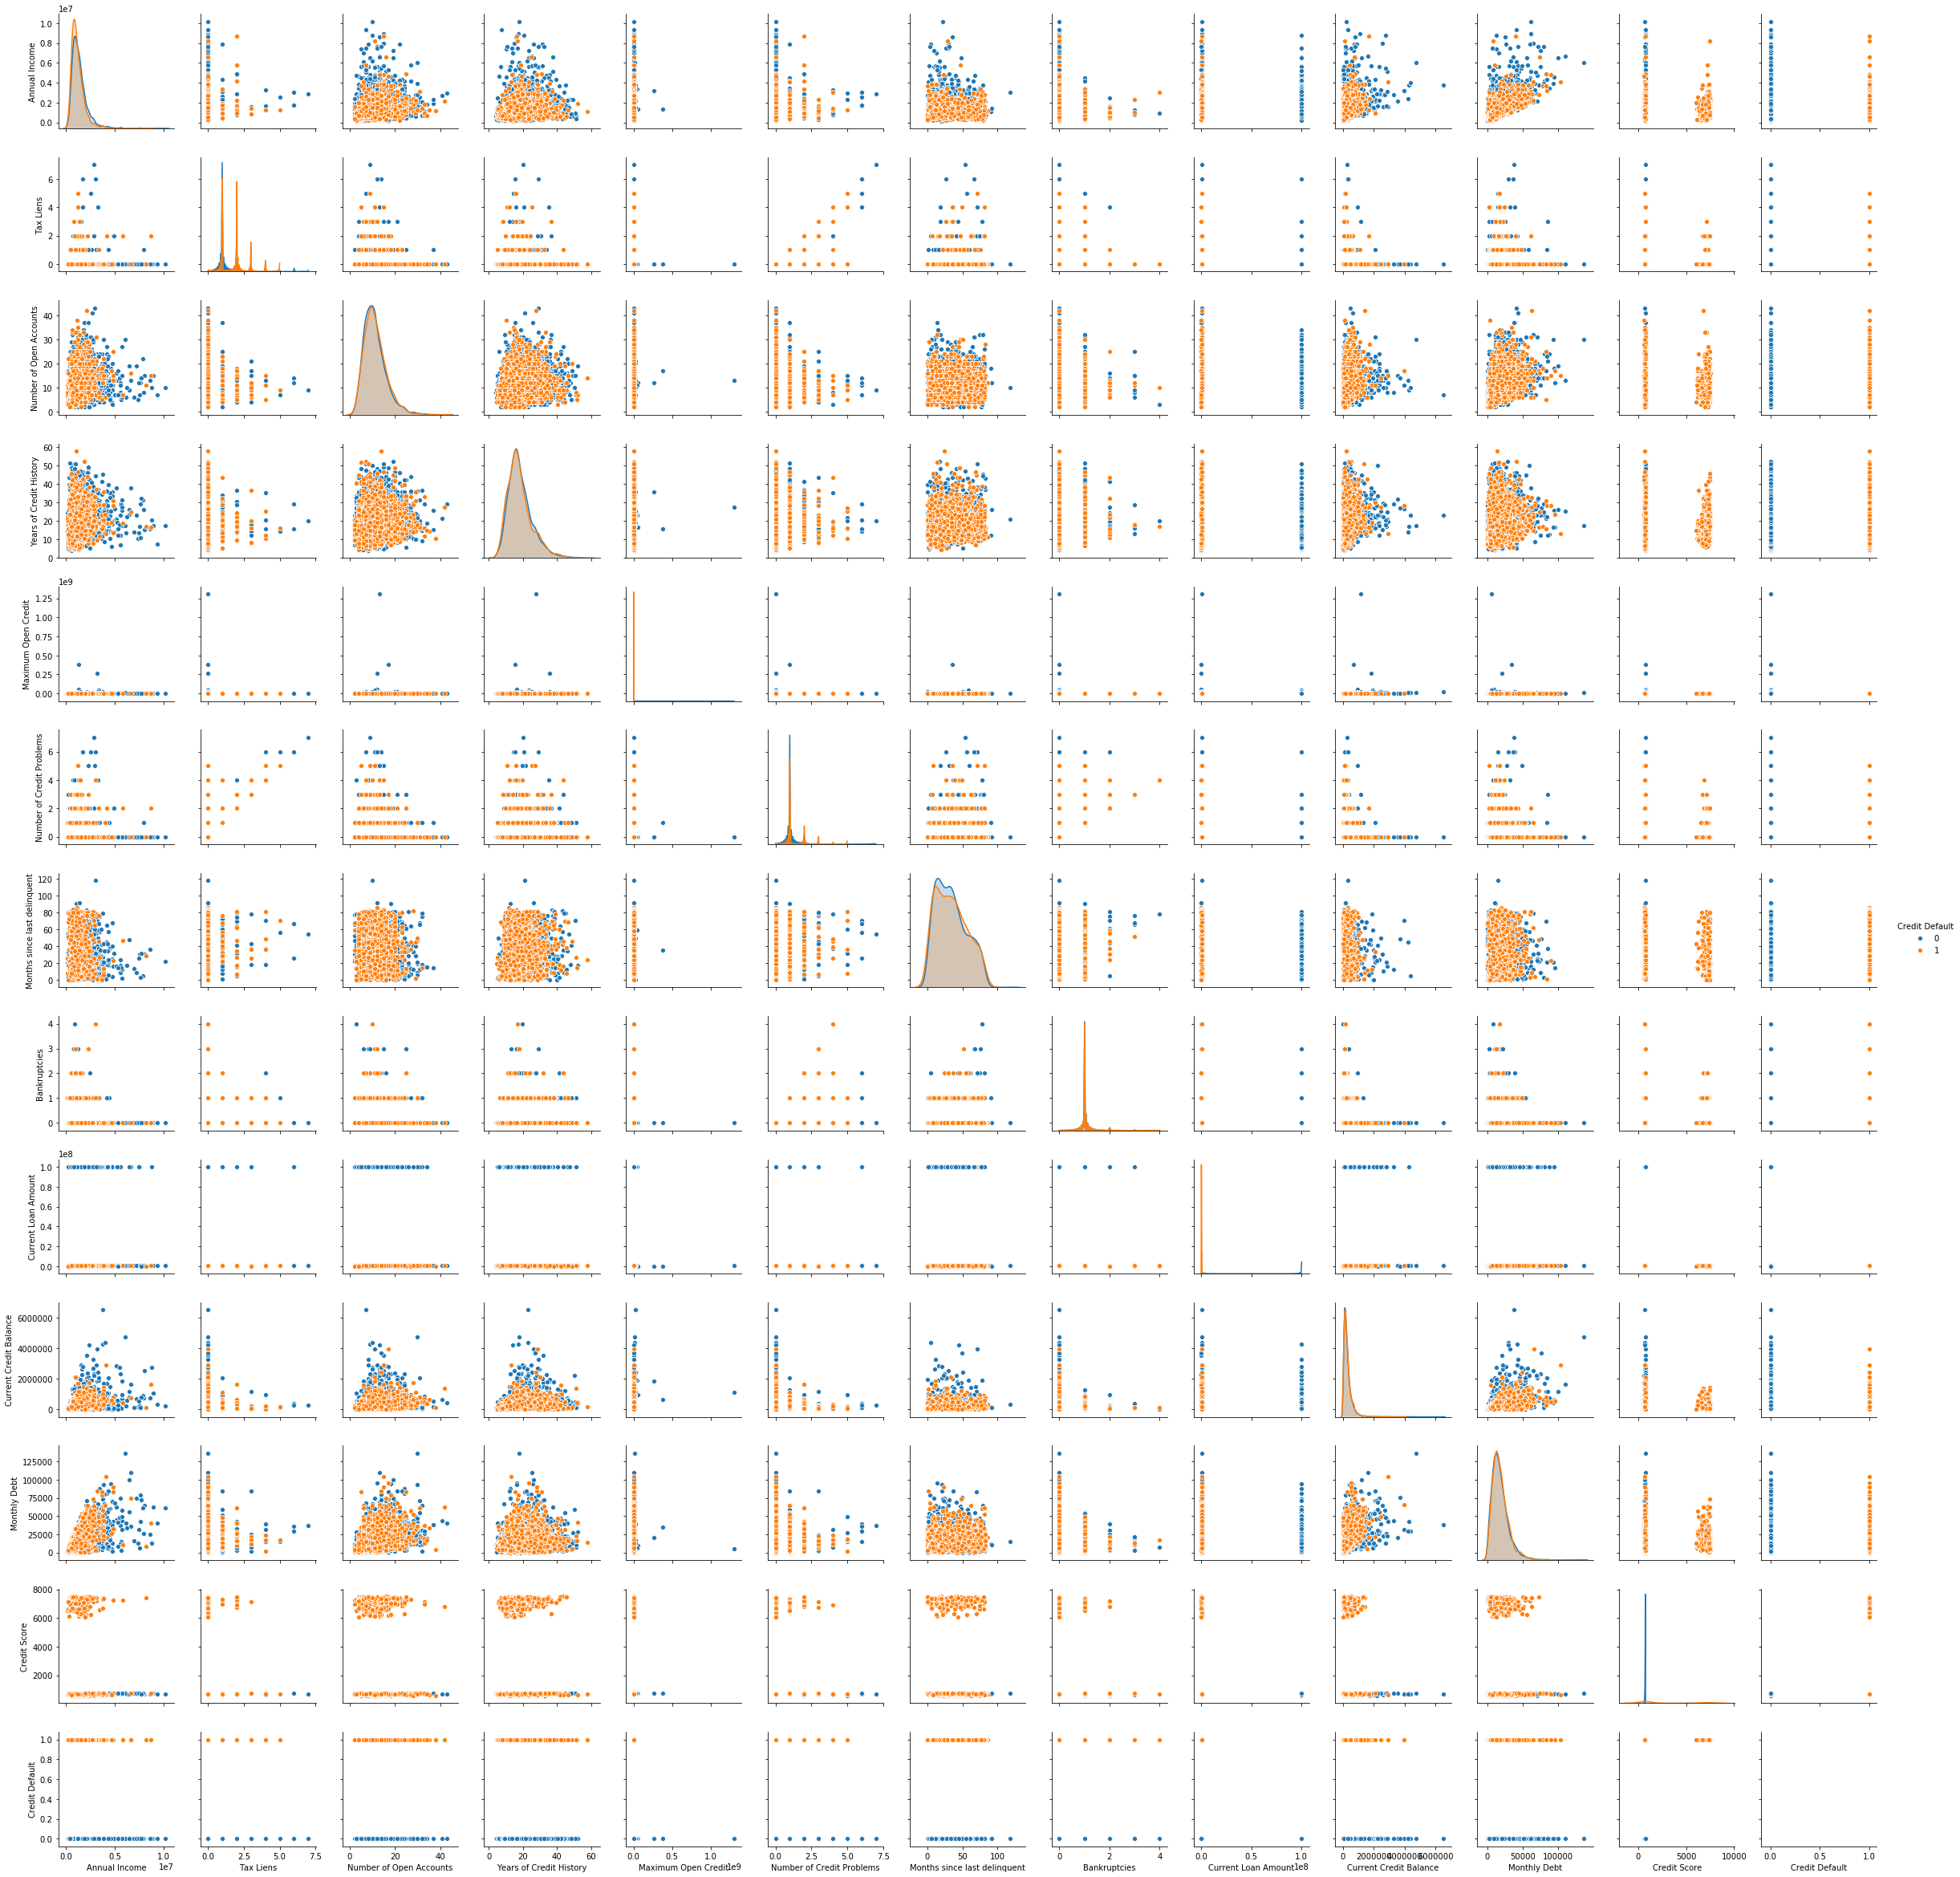

In [8]:
sns.pairplot(train, hue='Credit Default');

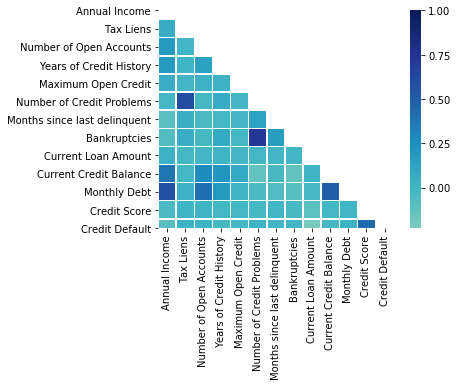

In [9]:
corr = train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, square=True, center=0, linewidths=.5, cmap='YlGnBu');

#### Credit Default

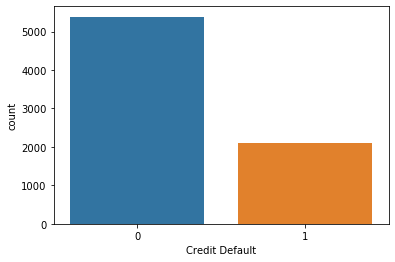

In [10]:
sns.countplot(train['Credit Default']);

In [11]:
train['Credit Default'].value_counts(normalize=True)

0    0.718267
1    0.281733
Name: Credit Default, dtype: float64

#### Home Ownership

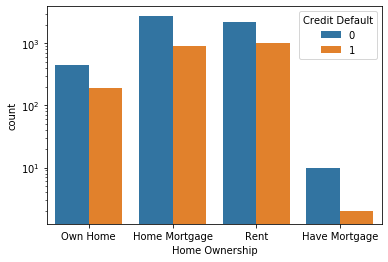

In [12]:
sns.countplot(train['Home Ownership'], hue=train['Credit Default'], log=True);

In [13]:
train['Home Ownership'].value_counts(normalize=True)

Home Mortgage    0.484933
Rent             0.427200
Own Home         0.086267
Have Mortgage    0.001600
Name: Home Ownership, dtype: float64

In [14]:
train.groupby(['Home Ownership'])['Credit Default'].mean()

Home Ownership
Have Mortgage    0.166667
Home Mortgage    0.251856
Own Home         0.296754
Rent             0.313046
Name: Credit Default, dtype: float64

#### Annual Income

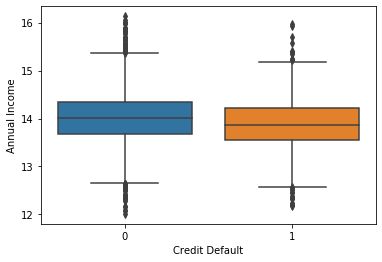

In [15]:
sns.boxplot(x=train['Credit Default'], y=np.log1p(train['Annual Income']));

#### Years in current job

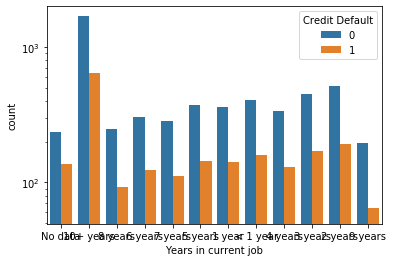

In [16]:
sns.countplot(train['Years in current job'].fillna('No data'), hue=train['Credit Default'], log=True);

In [17]:
train['Years in current job'].fillna('No data').value_counts(normalize=True)

10+ years    0.310933
2 years      0.094000
3 years      0.082667
< 1 year     0.075067
5 years      0.068800
1 year       0.067200
4 years      0.062533
6 years      0.056800
7 years      0.052800
No data      0.049467
8 years      0.045200
9 years      0.034533
Name: Years in current job, dtype: float64

In [18]:
train.groupby(train['Years in current job'].fillna('No data'))['Credit Default'].mean()

Years in current job
1 year       0.281746
10+ years    0.276158
2 years      0.273759
3 years      0.274194
4 years      0.279318
5 years      0.281008
6 years      0.291080
7 years      0.280303
8 years      0.271386
9 years      0.250965
< 1 year     0.282416
No data      0.369272
Name: Credit Default, dtype: float64

#### Tax Liens

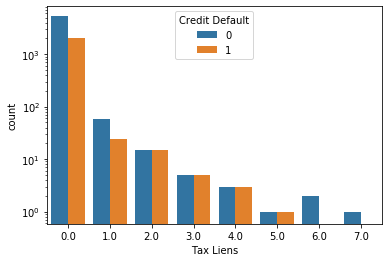

In [19]:
sns.countplot(train['Tax Liens'], hue=train['Credit Default'], log=True);

In [20]:
train['Tax Liens'].value_counts(normalize=True)

0.0    0.982133
1.0    0.011067
2.0    0.004000
3.0    0.001333
4.0    0.000800
5.0    0.000267
6.0    0.000267
7.0    0.000133
Name: Tax Liens, dtype: float64

In [21]:
train.groupby(['Tax Liens'])['Credit Default'].mean()

Tax Liens
0.0    0.280342
1.0    0.289157
2.0    0.500000
3.0    0.500000
4.0    0.500000
5.0    0.500000
6.0    0.000000
7.0    0.000000
Name: Credit Default, dtype: float64

#### Number of Open Accounts

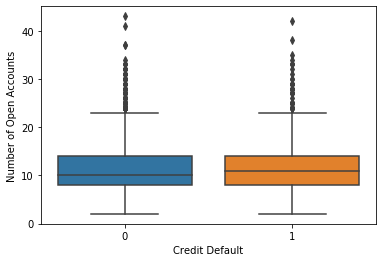

In [22]:
sns.boxplot(x=train['Credit Default'], y=(train['Number of Open Accounts']));

#### Years of Credit History

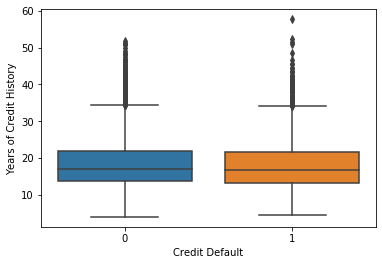

In [23]:
sns.boxplot(x=train['Credit Default'], y=(train['Years of Credit History']));

In [24]:
print(train[train['Years of Credit History'] > 55].shape[0])
train[train['Years of Credit History'] > 55].head()

1


,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
476,Home Mortgage,1076768.0,NaN,0.0,14.0,57.7,432124.0,0.0,24.0,0.0,debt consolidation,Long Term,558360.0,186219.0,13818.0,667.0,1


#### Maximum Open Credit

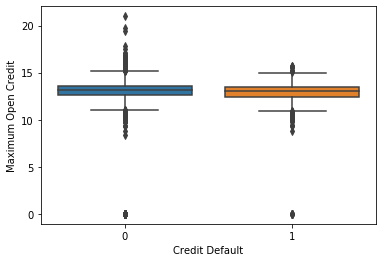

In [25]:
sns.boxplot(x=train['Credit Default'], y=np.log1p(train['Maximum Open Credit']));

# print(train[np.log1p(train['Maximum Open Credit']) > 16].shape[0])
train[np.log1p(train['Maximum Open Credit']) > 16]

In [26]:
print(train[np.log1p(train['Maximum Open Credit']) == 0].shape[0])
train[np.log1p(train['Maximum Open Credit']) == 0].head()

65


,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
8,Home Mortgage,NaN,5 years,0.0,17.0,15.7,0.0,1.0,NaN,1.0,home improvements,Short Term,129734.0,19.0,17.0,NaN,0
91,Rent,601369.0,10+ years,0.0,6.0,16.9,0.0,0.0,14.0,0.0,debt consolidation,Short Term,165924.0,0.0,9021.0,738.0,0
196,Rent,815157.0,7 years,0.0,3.0,8.8,0.0,0.0,NaN,0.0,small business,Short Term,218042.0,0.0,5855.0,738.0,0
294,Home Mortgage,2033931.0,7 years,0.0,6.0,21.1,0.0,0.0,NaN,0.0,home improvements,Short Term,108042.0,0.0,30340.0,742.0,0
309,Rent,1245792.0,3 years,0.0,5.0,22.4,0.0,0.0,58.0,0.0,major purchase,Long Term,338096.0,0.0,395.0,659.0,0


#### Number of Credit Problems

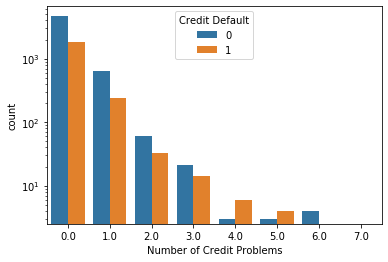

In [27]:
sns.countplot(train['Number of Credit Problems'], hue=train['Credit Default'], log=True);

In [28]:
train['Number of Credit Problems'].value_counts(normalize=True)

0.0    0.862533
1.0    0.117600
2.0    0.012400
3.0    0.004667
4.0    0.001200
5.0    0.000933
6.0    0.000533
7.0    0.000133
Name: Number of Credit Problems, dtype: float64

In [29]:
train.groupby(['Number of Credit Problems'])['Credit Default'].mean()

Number of Credit Problems
0.0    0.280569
1.0    0.273243
2.0    0.354839
3.0    0.400000
4.0    0.666667
5.0    0.571429
6.0    0.000000
7.0    0.000000
Name: Credit Default, dtype: float64

#### Months since last delinquent

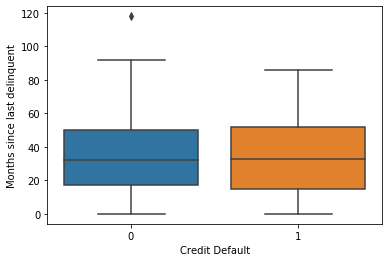

In [30]:
sns.boxplot(x=train['Credit Default'], y=train['Months since last delinquent']);

In [31]:
print(train[train['Months since last delinquent'] > 100].shape[0])
train[train['Months since last delinquent'] > 100].head()

1


,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
4191,Home Mortgage,3009201.0,6 years,0.0,10.0,20.8,773322.0,0.0,118.0,0.0,debt consolidation,Short Term,449592.0,299877.0,15297.0,738.0,0


#### Bankruptcies

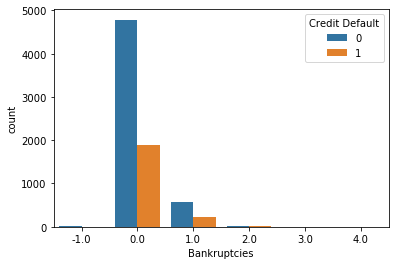

In [32]:
sns.countplot(train['Bankruptcies'].fillna(-1), hue=train['Credit Default']);

In [33]:
train['Bankruptcies'].fillna(-1).value_counts(normalize=True)

 0.0    0.888000
 1.0    0.104800
 2.0    0.004133
-1.0    0.001867
 3.0    0.000933
 4.0    0.000267
Name: Bankruptcies, dtype: float64

In [34]:
train.groupby(train['Bankruptcies'].fillna(-1))['Credit Default'].mean()

Bankruptcies
-1.0    0.285714
 0.0    0.281982
 1.0    0.276081
 2.0    0.354839
 3.0    0.285714
 4.0    0.500000
Name: Credit Default, dtype: float64

#### Purpose

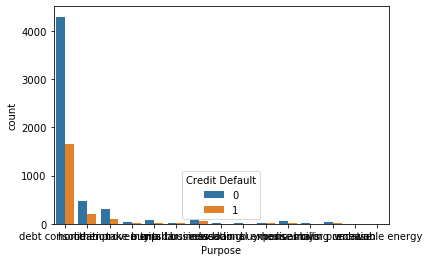

In [35]:
sns.countplot(train['Purpose'], hue=train['Credit Default']);

In [36]:
train['Purpose'].value_counts(normalize=True)

debt consolidation      0.792533
other                   0.088667
home improvements       0.054933
business loan           0.017200
buy a car               0.012800
medical bills           0.009467
major purchase          0.005333
take a trip             0.004933
buy house               0.004533
small business          0.003467
wedding                 0.002000
moving                  0.001467
educational expenses    0.001333
vacation                0.001067
renewable energy        0.000267
Name: Purpose, dtype: float64

In [37]:
train.groupby(['Purpose'])['Credit Default'].mean()

Purpose
business loan           0.426357
buy a car               0.250000
buy house               0.264706
debt consolidation      0.278264
educational expenses    0.100000
home improvements       0.262136
major purchase          0.225000
medical bills           0.309859
moving                  0.181818
other                   0.296241
renewable energy        1.000000
small business          0.538462
take a trip             0.270270
vacation                0.250000
wedding                 0.266667
Name: Credit Default, dtype: float64

#### Term

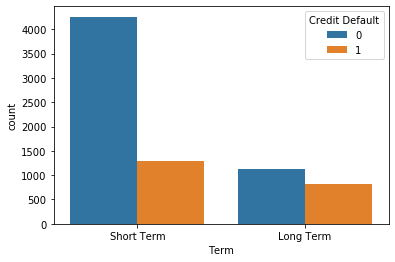

In [38]:
sns.countplot(train['Term'], hue=train['Credit Default']);

In [39]:
train['Term'].value_counts(normalize=True)

Short Term    0.7408
Long Term     0.2592
Name: Term, dtype: float64

In [40]:
train.groupby(['Term'])['Credit Default'].mean()

Term
Long Term     0.419753
Short Term    0.233441
Name: Credit Default, dtype: float64

#### Current Loan Amount

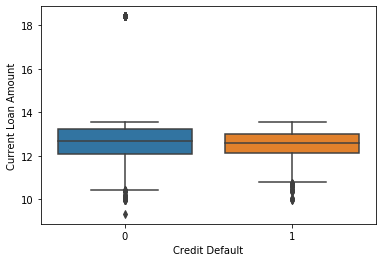

In [41]:
sns.boxplot(x=train['Credit Default'], y=np.log1p(train['Current Loan Amount']));

In [42]:
print(train[np.log1p(train['Current Loan Amount']) > 14].shape[0])
train[np.log1p(train['Current Loan Amount']) > 14].head()

870


,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
6,Home Mortgage,1511108.0,10+ years,0.0,9.0,20.3,388124.0,0.0,73.0,0.0,home improvements,Short Term,99999999.0,51623.0,2317.0,745.0,0
22,Rent,463790.0,NaN,0.0,6.0,28.3,288442.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,157700.0,5063.0,738.0,0
27,Rent,1004055.0,8 years,0.0,7.0,14.5,328394.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,195966.0,6041.0,734.0,0


#### Current Credit Balance

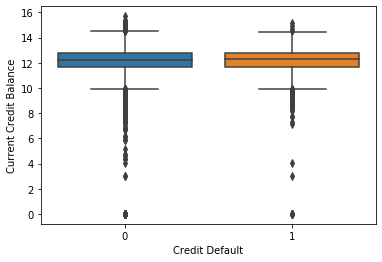

In [43]:
sns.boxplot(x=train['Credit Default'], y=np.log1p(train['Current Credit Balance']));

In [44]:
print(train[np.log1p(train['Current Credit Balance']) == 0].shape[0])
train[np.log1p(train['Current Credit Balance']) == 0].head()

53


,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
91,Rent,601369.0,10+ years,0.0,6.0,16.9,0.0,0.0,14.0,0.0,debt consolidation,Short Term,165924.0,0.0,9021.0,738.0,0
196,Rent,815157.0,7 years,0.0,3.0,8.8,0.0,0.0,NaN,0.0,small business,Short Term,218042.0,0.0,5855.0,738.0,0
294,Home Mortgage,2033931.0,7 years,0.0,6.0,21.1,0.0,0.0,NaN,0.0,home improvements,Short Term,108042.0,0.0,30340.0,742.0,0
309,Rent,1245792.0,3 years,0.0,5.0,22.4,0.0,0.0,58.0,0.0,major purchase,Long Term,338096.0,0.0,395.0,659.0,0
319,Own Home,NaN,< 1 year,0.0,2.0,10.5,0.0,0.0,NaN,0.0,business loan,Short Term,76670.0,0.0,6432.0,NaN,0


#### Monthly Debt

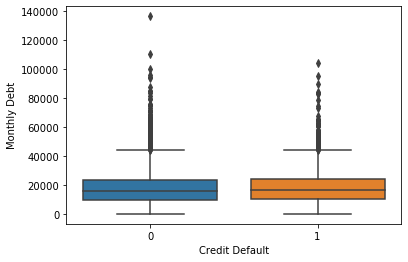

In [45]:
sns.boxplot(x=train['Credit Default'], y=(train['Monthly Debt']));

In [46]:
print(train[train['Monthly Debt'] > 120000].shape[0])
train[train['Monthly Debt'] > 120000].head()

1


,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
4745,Own Home,6029954.0,4 years,0.0,30.0,17.5,11603856.0,0.0,NaN,0.0,debt consolidation,Short Term,753588.0,4720132.0,136679.0,745.0,0


#### Credit Score

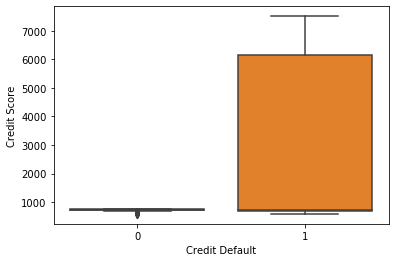

In [47]:
sns.boxplot(x=train['Credit Default'], y=(train['Credit Score']));

In [48]:
print(train[train['Credit Score'] > 1000].shape[0])
train[train['Credit Score'] > 1000].head()

400


,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
69,Home Mortgage,1408527.0,2 years,0.0,12.0,17.5,700062.0,0.0,21.0,0.0,other,Long Term,525998.0,174135.0,9320.0,6470.0,1
87,Home Mortgage,1533566.0,7 years,0.0,11.0,14.8,715462.0,0.0,19.0,0.0,debt consolidation,Short Term,210826.0,285475.0,18147.0,7440.0,1
94,Rent,1049294.0,3 years,0.0,5.0,6.1,249810.0,0.0,NaN,0.0,business loan,Short Term,337502.0,119529.0,15215.0,7010.0,1
96,Rent,757568.0,5 years,0.0,13.0,11.4,383548.0,0.0,NaN,0.0,debt consolidation,Short Term,210518.0,276583.0,11553.0,7320.0,1
116,Home Mortgage,1039984.0,NaN,0.0,10.0,23.8,147950.0,0.0,63.0,0.0,debt consolidation,Short Term,224246.0,95456.0,13780.0,7390.0,1


#### Обработка выбросов

In [49]:
train_wo_outliers = train[~train['Tax Liens'].isin([6, 7])].copy()
train_wo_outliers = train_wo_outliers[train_wo_outliers['Maximum Open Credit'] > 0]
train_wo_outliers = train_wo_outliers[np.log1p(train_wo_outliers['Maximum Open Credit']) <= 16]
train_wo_outliers = train_wo_outliers[~train_wo_outliers['Number of Credit Problems'].isin([6, 7])]
train_wo_outliers = train_wo_outliers[train_wo_outliers['Months since last delinquent'].fillna(0) <= 100]
train_wo_outliers = train_wo_outliers[np.log1p(train_wo_outliers['Current Loan Amount']) <= 14]
train_wo_outliers = train_wo_outliers[np.log1p(train_wo_outliers['Current Credit Balance']) > 0]
train_wo_outliers = train_wo_outliers[~train_wo_outliers['Purpose'].isin(['renewable energy'])]
train_wo_outliers = train_wo_outliers[train_wo_outliers['Monthly Debt'] <= 120000]

In [50]:
print(train_wo_outliers.shape)

(6548, 17)


In [51]:
train_wo_outliers.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0
5,Rent,NaN,7 years,0.0,12.0,14.6,366784.0,0.0,NaN,0.0,other,Long Term,337304.0,165680.0,18692.0,NaN,1
7,Rent,1040060.0,10+ years,0.0,13.0,12.0,330374.0,0.0,18.0,0.0,other,Short Term,250888.0,89015.0,19761.0,705.0,1


#### Предобработка данных

In [52]:
cat_features = list(train.select_dtypes(include=[object]).columns.values)
num_features = list(feature for feature in train.columns if feature not in cat_features )

In [53]:
def preproc(input_data, categorical_features=[]):
    
    output_data = input_data.copy()
    output_data['Annual Income'].fillna(-1, inplace=True)
    output_data['Years in current job'].fillna('No data', inplace=True)
    output_data['Credit Score'].fillna(-1, inplace=True)
    output_data['Months since last delinquent'].fillna(-1, inplace=True)
    output_data['Bankruptcies'].fillna(-1, inplace=True)
    
    if len(categorical_features) > 0:
        
        X = pd.get_dummies(output_data, columns=cat_features, drop_first=False).copy()
        
        if 'Credit Default' in X.columns:
            X.drop(['Credit Default'], axis=1, inplace=True)
            y = output_data['Credit Default'].values.copy()

            return X, y
        
        else:
            return X
    
    else:
        
        X = output_data.copy()
        
        if 'Credit Default' in X.columns:
            X.drop(['Credit Default'], axis=1, inplace=True)
            y = output_data['Credit Default'].values.copy()

            return X, y
        
        else:
            return X
        

In [54]:
X, y = preproc(train_wo_outliers, cat_features)

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6548 entries, 1 to 7499
Data columns (total 44 columns):
Annual Income                     6548 non-null float64
Tax Liens                         6548 non-null float64
Number of Open Accounts           6548 non-null float64
Years of Credit History           6548 non-null float64
Maximum Open Credit               6548 non-null float64
Number of Credit Problems         6548 non-null float64
Months since last delinquent      6548 non-null float64
Bankruptcies                      6548 non-null float64
Current Loan Amount               6548 non-null float64
Current Credit Balance            6548 non-null float64
Monthly Debt                      6548 non-null float64
Credit Score                      6548 non-null float64
Home Ownership_Have Mortgage      6548 non-null uint8
Home Ownership_Home Mortgage      6548 non-null uint8
Home Ownership_Own Home           6548 non-null uint8
Home Ownership_Rent               6548 non-null uint8
Years

In [56]:
X.shape

(6548, 44)

In [57]:
X.head()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,...,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
1,1025487.0,0.0,15.0,15.3,1181730.0,0.0,-1.0,0.0,264968.0,394972.0,...,0,0,0,0,0,0,0,0,1,0
3,805068.0,0.0,8.0,22.5,147400.0,1.0,-1.0,1.0,121396.0,95855.0,...,0,0,0,0,0,0,0,0,0,1
4,776264.0,0.0,13.0,13.6,385836.0,1.0,-1.0,0.0,125840.0,93309.0,...,0,0,0,0,0,0,0,0,0,1
5,-1.0,0.0,12.0,14.6,366784.0,0.0,-1.0,0.0,337304.0,165680.0,...,0,0,0,1,0,0,0,0,1,0
7,1040060.0,0.0,13.0,12.0,330374.0,0.0,18.0,0.0,250888.0,89015.0,...,0,0,0,1,0,0,0,0,0,1


#### Отбор признаков

In [58]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_auc_score, log_loss, f1_score, classification_report
from lightgbm import LGBMClassifier

In [59]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

In [60]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [61]:
clf = LGBMClassifier(random_state=42)

rfecv = RFECV(clf, cv=skf, scoring='neg_log_loss', n_jobs=2)

rfecv.fit(X_train.values, y_train)

features = rfecv.support_

In [62]:
print(f'Из {X.shape[1]} отобрано {np.sum(features)} признаков')
print(X_train.loc[:, features].columns)

Из 44 отобрано 27 признаков
Index(['Annual Income', 'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Current Loan Amount',
       'Current Credit Balance', 'Monthly Debt', 'Credit Score',
       'Home Ownership_Home Mortgage', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Years in current job_1 year',
       'Years in current job_10+ years', 'Years in current job_2 years',
       'Years in current job_6 years', 'Years in current job_7 years',
       'Years in current job_8 years', 'Years in current job_9 years',
       'Years in current job_< 1 year', 'Years in current job_No data',
       'Purpose_business loan', 'Purpose_debt consolidation', 'Purpose_other',
       'Term_Long Term'],
      dtype='object')


#### Построение baseline модели

In [63]:
baseline = LGBMClassifier(n_estimators=100, max_depth=3, random_state=42)

baseline.fit(X_train.loc[:, features].values, y_train)

y_train_hat = baseline.predict(X_train.loc[:, features].values)
y_valid_hat = baseline.predict(X_valid.loc[:, features].values)

print(f'Train F1: {f1_score(y_train, y_train_hat)}')
print(f'Valid F1: {f1_score(y_valid, y_valid_hat)}')

Train F1: 0.4837758112094396
Valid F1: 0.4537246049661399


#### Подбор гиперпараметров

In [64]:
params = {
    'n_estimators': np.arange(100, 221, 10),
    'max_depth': np.arange(2, 7, 1),
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': np.linspace(0.6, 0.95, 8),
    'colsample_bytree': np.linspace(0.6, 0.95, 8),
    'reg_alpha': np.linspace(0.1, 0.95, 18),
    'reg_lambda': np.linspace(0.1, 0.95, 18)
}

n = 4000

est = LGBMClassifier(n_estimators=100, max_depth=3, random_state=42)

rscv = RandomizedSearchCV(est, param_distributions=params, n_iter=n, cv=skf, 
                          scoring='neg_log_loss', random_state=42, n_jobs=2, verbose=True)

rscv.fit(X_train.loc[:, features].values, y_train)

print(rscv.best_score_)
print(rscv.best_params_)

Fitting 3 folds for each of 4000 candidates, totalling 12000 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    4.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   19.2s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:   40.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:  3.2min
[Parallel(n_jobs=2)]: Done 3005 tasks      | elapsed:  5.0min
[Parallel(n_jobs=2)]: Done 4505 tasks      | elapsed:  7.6min
[Parallel(n_jobs=2)]: Done 6205 tasks      | elapsed: 10.7min
[Parallel(n_jobs=2)]: Done 8105 tasks      | elapsed: 14.2min
[Parallel(n_jobs=2)]: Done 10205 tasks      | elapsed: 17.7min
[Parallel(n_jobs=2)]: Done 11997 out of 12000 | elapsed: 20.2min remaining:    0.2s


-0.5182502890349298
{'subsample': 0.95, 'reg_lambda': 0.35, 'reg_alpha': 0.15, 'n_estimators': 130, 'max_depth': 2, 'learning_rate': 0.1, 'colsample_bytree': 0.6}


[Parallel(n_jobs=2)]: Done 12000 out of 12000 | elapsed: 20.2min finished


#### Оценка качества модели

In [65]:
def get_threshold(y_true, y_proba, eps=0.001):

    ts = dict()

    for t in np.arange(0, 1, eps):
        y_hat = np.array(y_proba[:, 1] >= t).astype(int)
        ts[t] = f1_score(y_true, y_hat)

    sorted_ts = sorted(ts.items(), key=lambda x: -x[1])

    return sorted_ts[0][0]


#### Baseline model

In [66]:
y_train_proba = baseline.predict_proba(X_train.loc[:, features].values)
y_valid_proba = baseline.predict_proba(X_valid.loc[:, features].values)

t = get_threshold(y_train, y_train_proba)

print(f'Threshold t = {t}')

y_train_hat = np.array(y_train_proba[:, 1] >= t).astype(int)
y_valid_hat = np.array(y_valid_proba[:, 1] >= t).astype(int)

print(f'Train F1: {f1_score(y_train, y_train_hat)}')
print(f'Valid F1: {f1_score(y_valid, y_valid_hat)}')

Threshold t = 0.28800000000000003
Train F1: 0.6249641319942612
Valid F1: 0.5504087193460492


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Tuned model

In [67]:
y_train_proba = rscv.best_estimator_.predict_proba(X_train.loc[:, features].values)
y_valid_proba = rscv.best_estimator_.predict_proba(X_valid.loc[:, features].values)

t = get_threshold(y_train, y_train_proba)

print(f'Threshold t = {t}')

y_train_hat = np.array(y_train_proba[:, 1] >= t).astype(int)
y_valid_hat = np.array(y_valid_proba[:, 1] >= t).astype(int)

print(f'Train F1: {f1_score(y_train, y_train_hat)}')
print(f'Valid F1: {f1_score(y_valid, y_valid_hat)}')

Threshold t = 0.28200000000000003
Train F1: 0.5984079055723305
Valid F1: 0.5458141067897165


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Предсказание на тестовых данных

In [68]:
from sklearn.base import clone 

In [69]:
model = clone(rscv.best_estimator_)

model.fit(X.loc[:, features], y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.6,
               importance_type='split', learning_rate=0.1, max_depth=2,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=130, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.15, reg_lambda=0.35, silent=True,
               subsample=0.95, subsample_for_bin=200000, subsample_freq=0)

In [70]:
X_test = preproc(test, cat_features)

In [71]:
X_test.head()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,...,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
0,-1.0,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,162470.0,105906.0,...,0,0,0,0,0,0,0,0,0,1
1,231838.0,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,78298.0,46037.0,...,0,0,0,0,0,0,0,0,0,1
2,1152540.0,0.0,10.0,13.7,204600.0,0.0,-1.0,0.0,200178.0,146490.0,...,0,0,0,0,0,0,0,0,0,1
3,1220313.0,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,217382.0,213199.0,...,0,0,0,0,0,0,0,0,0,1
4,2340952.0,0.0,11.0,23.6,1207272.0,0.0,-1.0,0.0,777634.0,425391.0,...,0,0,0,0,0,0,0,0,1,0


In [72]:
y_test_proba = model.predict_proba(X_test.loc[:, features].values)
y_test_hat = np.array(y_test_proba[:, 1] >= t).astype(int)

In [73]:
predictions = pd.DataFrame()
predictions['Credit Default'] = y_test_hat

In [74]:
predictions.head()

,Credit Default
0,1
1,1
2,1
3,0
4,0


In [75]:
predictions.to_csv('AZelepukin_predictions.csv', index=True, encoding='utf-8')